In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay


**Importing the dataset**

In [4]:
data = pd.read_csv("Social_Network_Ads.csv")

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [13]:
#Encoding labels
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [14]:
X = data.drop(columns=['User ID','Purchased'],axis=1)
Y = data['Purchased']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

**Feature Scaling**

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


**Fitting SVM to the Training set**

In [22]:
classifier = SVC()
classifier.fit(x_train,y_train)


SVC()

**Predicting the Test set results**

In [25]:
ypred = classifier.predict(x_test)

**Making the Confusion Matrix**

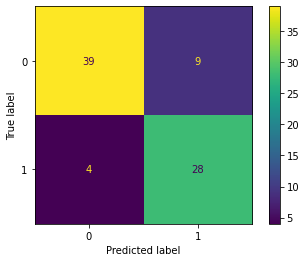

In [30]:
ConfusionMatrixDisplay.from_estimator(classifier,x_test,y_test)

**Visualising the Training set results**

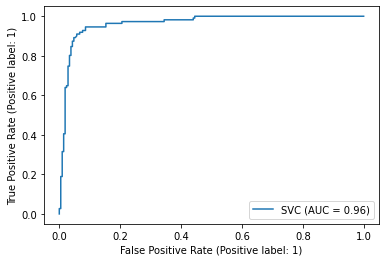

In [34]:

RocCurveDisplay.from_estimator(classifier,x_train,y_train)

**Visualising the Test set results**

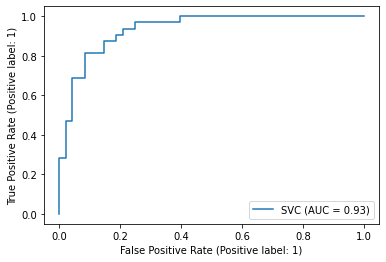

In [33]:
RocCurveDisplay.from_estimator(classifier,x_test,y_test)